Import network and other stuff

In [24]:
import os, pickle, matplotlib
import matplotlib.pyplot as plt
from constants import *

Define PATH for results for the playround experiment (with you own data). If you comment this code all the results with real data in 'results' folder will be updated and you want be able to test processing jupyter notes with real result

In [25]:
# PATH_RESULTS = './results_test/'

Pick dataset and experiment to plot losses

In [26]:
DATA_NAME, EXPERIMENT = '1_[res]_[sus, delayedSus]/', ['spleen', 'liver']

Download saved losses

In [27]:
if len(EXPERIMENT) >1:
    rootDir = PATH_RESULTS + DATA_NAME + 'all/'
else:
    rootDir = PATH_RESULTS + DATA_NAME + EXPERIMENT[0] + '/'
if os.path.exists(rootDir + 'losses/' + "losses.pickle"):
    with open(rootDir+'losses/' + f'losses.pickle', 'rb') as handle:
        Losses = pickle.load(handle)
else:
    print(f"The losses are not avaulable, consider evaluate one run experiment first!")

Some auxilary code

In [28]:
LossKeys = ['loss', 'lossCls', 'lossRec', 'lossKL', 'lossSparse']
losses = {'train': dict(), "valid":dict()}
losses['train']
for LossKey in LossKeys:
    losses['train'][LossKey] = list(map(lambda x, y: 0.5*x + 0.5*y, Losses[0]['spleen'][LossKey], Losses[0]['liver'][LossKey]))
    losses['valid'][LossKey] = list(map(lambda x, y: 0.5*x + 0.5*y, Losses[1]['spleen'][LossKey], Losses[1]['liver'][LossKey]))

mapLoss = dict(zip(LossKeys, ['overall Loss', 'weighted logLoss', 'weighted MSE-loss', 'weighted KL-divergence', r'weighted $l_1$-norm']))
mapLossToLabel = dict(zip(LossKeys, [r'$Loss$', r'$\gamma \cdot \sum_{i} \, \log Loss_i$',  r'$\alpha \cdot \sum_{i} \, MSE_i$', r'$\beta \cdot \sum_{i} \, D_{KL_{i}}$', r'$\theta \cdot \left\|\mathbf{W}\right\|_1$']))

Plot and save losses

loss
overall Loss
$Loss$


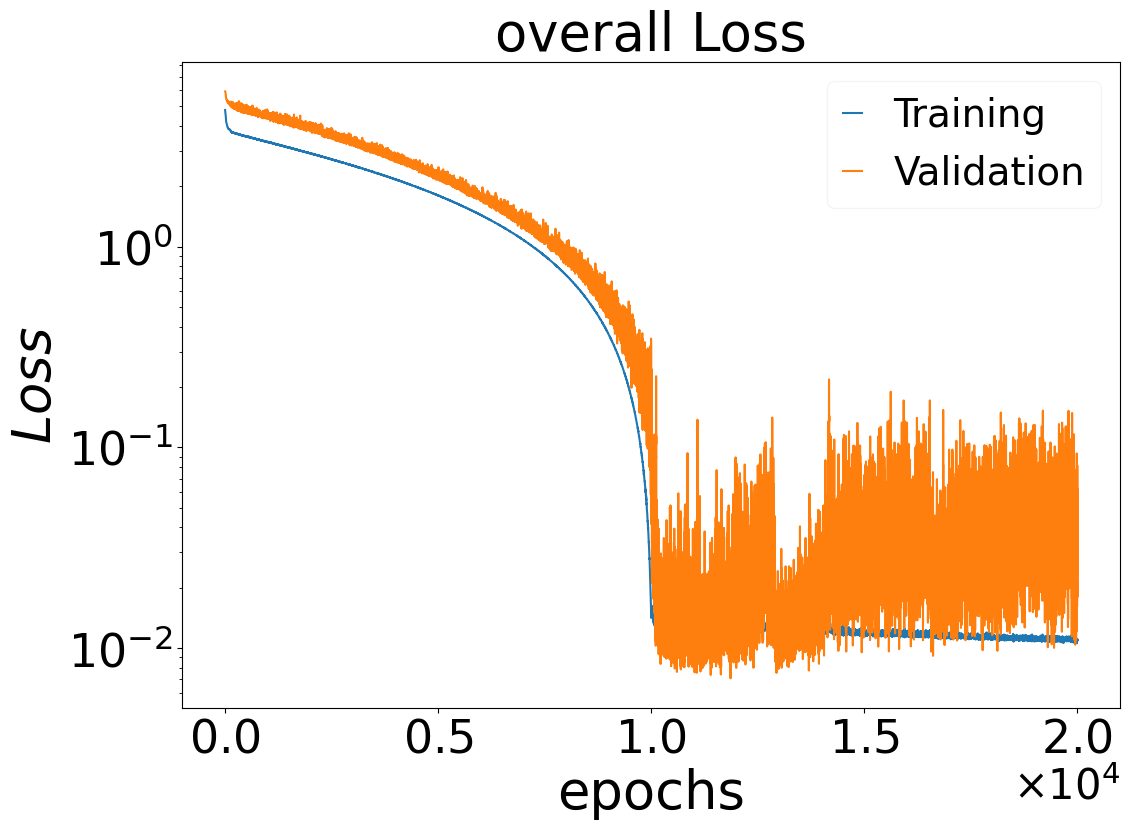

lossCls
weighted logLoss
$\gamma \cdot \sum_{i} \, \log Loss_i$


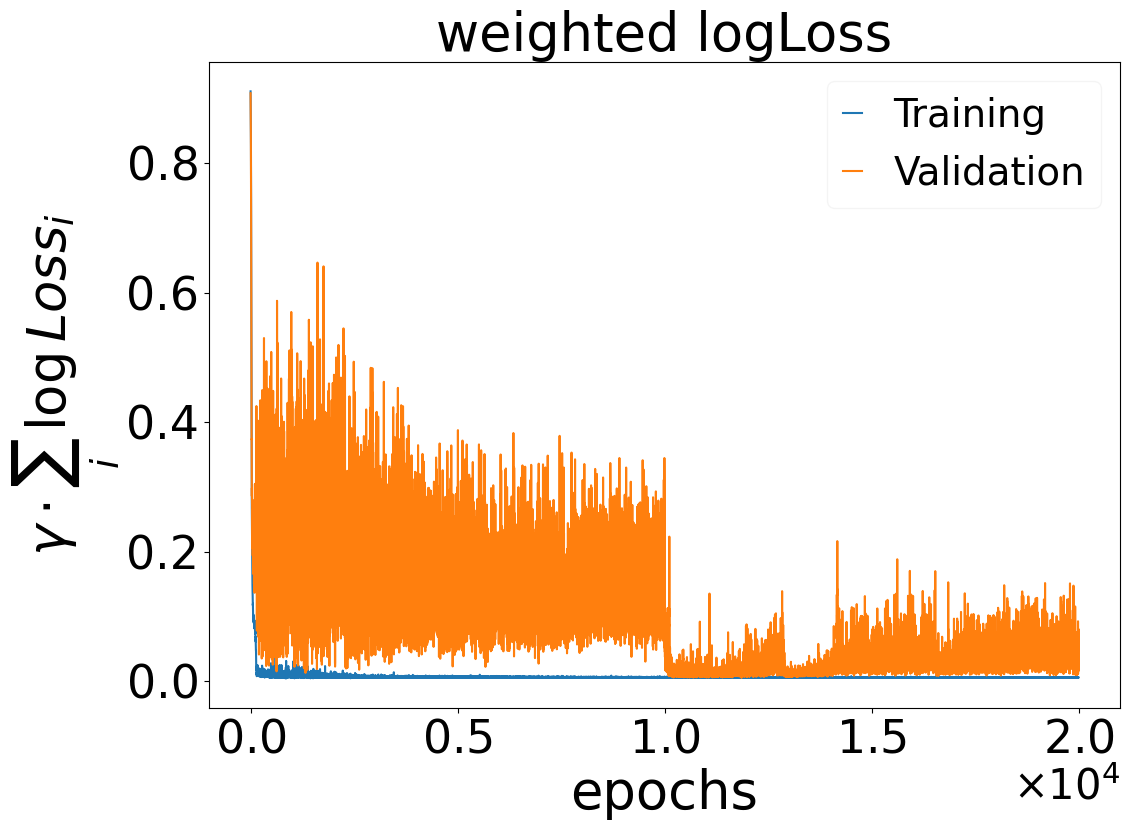

lossRec
weighted MSE-loss
$\alpha \cdot \sum_{i} \, MSE_i$


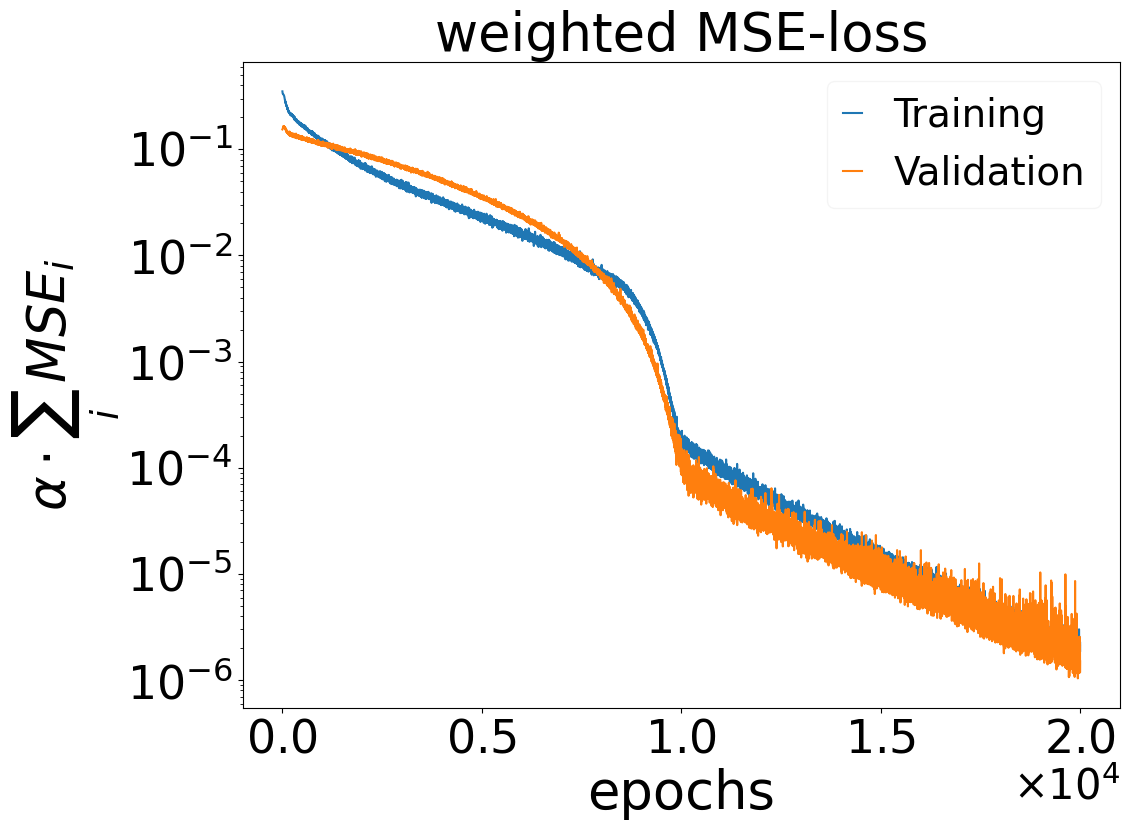

lossKL
weighted KL-divergence
$\beta \cdot \sum_{i} \, D_{KL_{i}}$


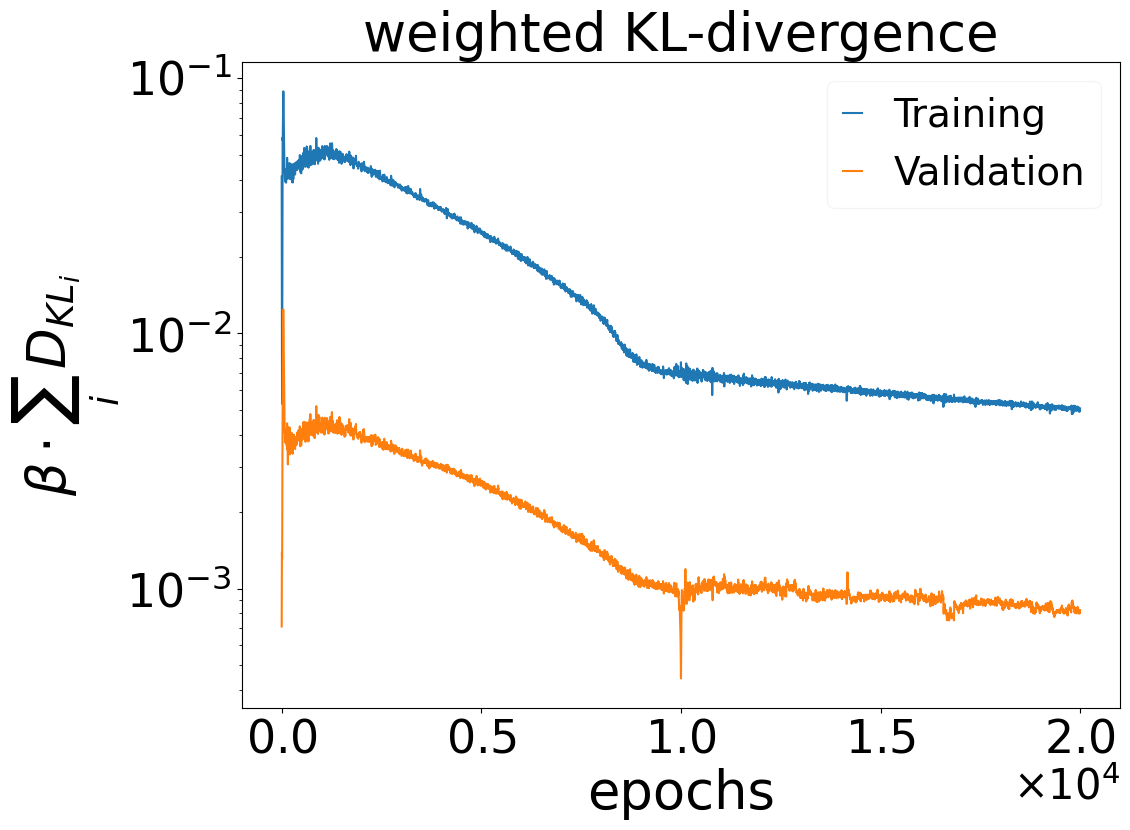

lossSparse
weighted $l_1$-norm
$\theta \cdot \left\|\mathbf{W}\right\|_1$


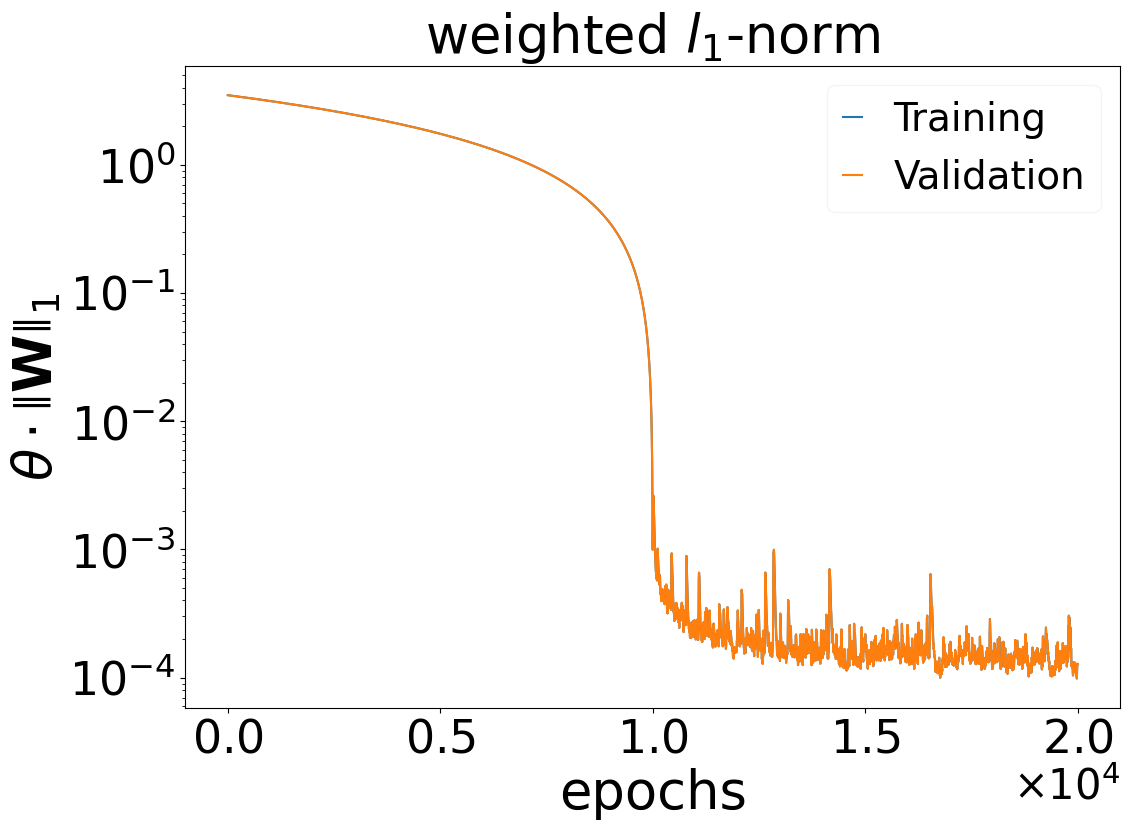

In [29]:
matplotlib.rcParams['font.size']=30
for LossKey in LossKeys:
    # if not LossKey == 'lossKL':
    print(LossKey)
    print(mapLoss[LossKey])
    print(mapLossToLabel[LossKey])
    fig = plt.figure(figsize=(12, 9))
    if LossKey != 'lossCls':
        plt.semilogy(losses['train'][LossKey], label = 'Training')
        plt.semilogy(losses['valid'][LossKey], label = 'Validation')
    else:
        plt.plot(losses['train'][LossKey], label = 'Training')
        plt.plot(losses['valid'][LossKey], label = 'Validation')

    
    plt.xlabel('epoch')
    # plt.title(f'{_1.upper()}: {mapLoss[_2]}')
    plt.title(f'{mapLoss[LossKey]}', size=38)
    plt.ylabel(mapLossToLabel[LossKey], size=38)
    plt.xlabel('epochs',size=38)
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText = True)
    plt.legend(fontsize=28, framealpha=0.2, handlelength=.5)
    plt.xticks(fontsize=33)
    plt.yticks(fontsize=33)
    plt.tight_layout()
    plt.savefig(rootDir+'losses/'+f'{LossKey}.png')
    plt.show()
    # plt.close()